## Count stanzas and lines

In [1]:
from collections import Counter, defaultdict
import itertools
from pathlib import Path
import string

import matplotlib.pyplot as plt
import nltk
import pandas as pd

In [2]:
name = "tita"

poem_df = pd.read_csv(f"tsvs/{name}_rhymes_poems.tsv", sep="\t")
poem_df

,rhyme scheme,stanza,filename,stanza number (in file)
0,AABCCBI,"Gud, la oss i din kunnskap fremmes,\nså det vi...",2009013000065_1_annotated.txt,0
1,TAABCCB,ANNEN SANG\nFra Landego seiles mot Skrova i no...,2007011001018_11_annotated.txt,0
2,AABCCB,Og er det en høstkveld når mørket står på\nså ...,2007011001018_11_annotated.txt,1
3,AABCCB,"Snart ligger og kaien der dyngvåt av regn,\nog...",2007011001018_11_annotated.txt,2
4,AABCCB,Og rett bort i øst ligger Svinøya gård\nhvor B...,2007011001018_11_annotated.txt,3
...,...,...,...,...
5153,AABB,Lukket! Lukket! Øde veier! Gledens vinger brut...,2011041408091_18_annotated.txt,5
5154,AABB,Og nå stod han her som fremmed i et fremmed la...,2011041408091_18_annotated.txt,6
5155,AABB,"Opp av havets blanke bølger, som en vårfrisk m...",2011041408091_18_annotated.txt,7
5156,AABB,"Til Europa! Tanken slår ham plutselig som lyn,...",2011041408091_18_annotated.txt,8


In [3]:
lines = sum(len(stanza.split("\n")) for stanza in poem_df.stanza)
poems = len(set(poem_df.filename))
print(f"Poems: {poems}\nStanzas: {len(poem_df)}\nLines: {lines}")

Poems: 508
Stanzas: 5158
Lines: 26198


## Count rhyme schemes

In [4]:
rhyme_schemes = list(poem_df["rhyme scheme"])

c = Counter(rhyme_schemes)
l = list(c.items())
l.sort(key = lambda x: x[1], reverse = True)

title_schemes = [s for s in rhyme_schemes if "T" in s]
info_schemes = [s for s in rhyme_schemes if "I" in s]
noise_schemes = [s for s in rhyme_schemes if "N" in s]

print(f"Schemes with title: {len(title_schemes)}\nschemes with info: {len(info_schemes)}\nschemes with noise: {len(noise_schemes)}")
df = pd.DataFrame(l, columns = ["scheme", "count"])
df

Schemes with title: 349
schemes with info: 80
schemes with noise: 2


,scheme,count
0,ABAB,1059
1,ABCB,699
2,AABB,571
3,AABCCB,336
4,ABBA,170
...,...,...
593,ABCDBEC,1
594,ABAAC,1
595,TABBACC,1
596,TIABAC,1


## Remove title, info and noise code for rhyme scheme statistics

In [5]:
new_rhyme_schemes = [scheme.replace("T", "").replace("I", "").replace("N", "") for scheme in rhyme_schemes]
c2 = Counter(new_rhyme_schemes)
l2 = list(c2.items())
l2.sort(key = lambda x: x[1], reverse = True)
df2 = pd.DataFrame(l2, columns = ["scheme", "count"])
df2

,scheme,count
0,ABAB,1142
1,ABCB,749
2,AABB,611
3,AABCCB,360
4,ABBA,181
...,...,...
485,ABCDEFGHG,1
486,ABCDCEA,1
487,ABCDBEC,1
488,ABAAC,1


In [6]:
df2.to_csv("tsvs/rhyme_scheme_counts_clean.tsv", sep="\t", index=False)

In [7]:
one_occurence = df2.loc[df2["count"]==1]
one_occurence

,scheme,count
187,AABCDEFD,1
188,ABACBDCD,1
189,ABABBB,1
190,ABBBA,1
191,AABCCDDA,1
...,...,...
485,ABCDEFGHG,1
486,ABCDCEA,1
487,ABCDBEC,1
488,ABAAC,1


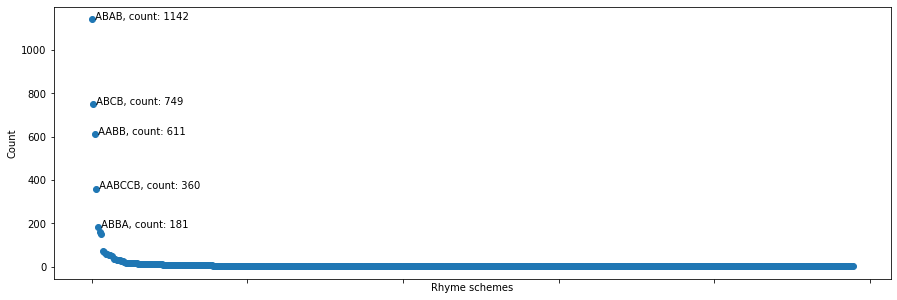

In [8]:
x = df2["scheme"]
x_i = df2.index
y = df2["count"]

fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(x_i, y)

for i in range(5):
    ax.annotate(f" {x[i]}, count: {y[i]}", (x_i[i], y[i]))

plt.setp(ax.get_xticklabels(), visible=False)
plt.xlabel(f"Rhyme schemes")
plt.ylabel("Count")

plt.show()

In [9]:
more_than_five = df2.loc[df2["count"]>=5]
x = more_than_five["scheme"]
y = more_than_five["count"]
len(more_than_five)

87

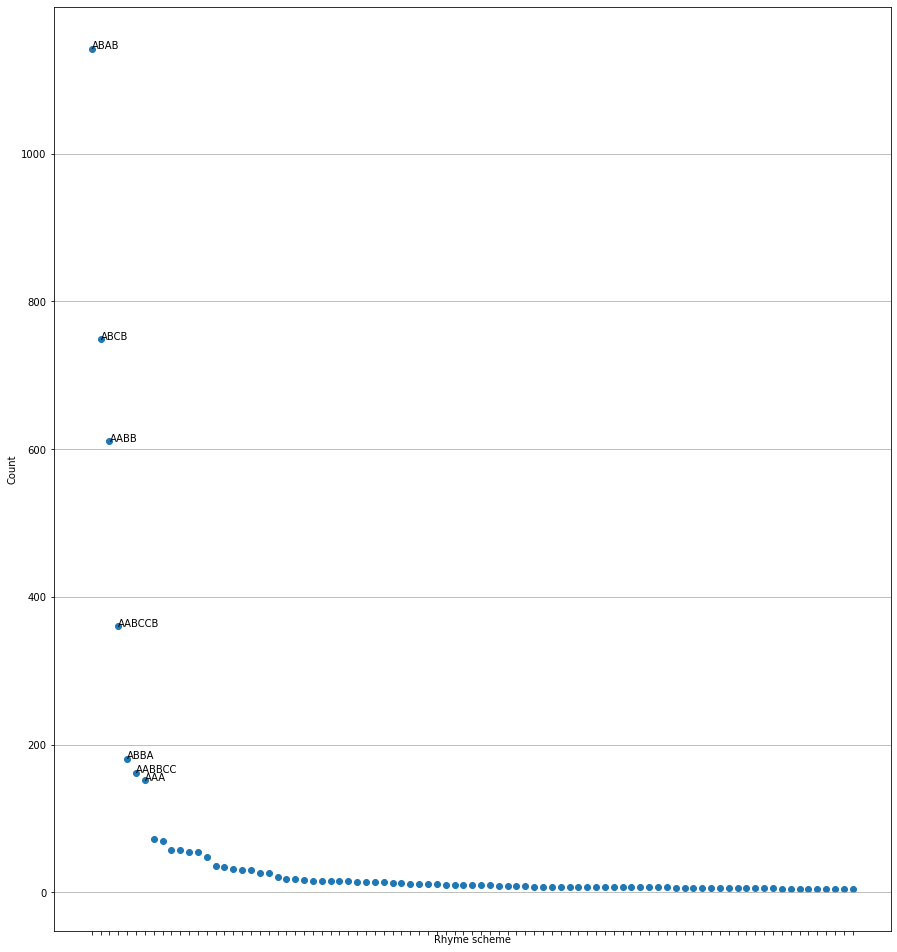

In [10]:
fig, ax = plt.subplots(figsize=(15, 17))
ax.scatter(x, y)

for i in range(7):
    ax.annotate(x[i], (x[i], y[i]))

plt.setp(ax.get_xticklabels(), visible=False)
plt.xlabel("Rhyme scheme")
plt.ylabel("Count")
plt.grid(axis="y")

plt.show()

In [11]:
top_ten = df2[:10]
top_ten

,scheme,count
0,ABAB,1142
1,ABCB,749
2,AABB,611
3,AABCCB,360
4,ABBA,181
5,AABBCC,162
6,AAA,152
7,ABAAB,73
8,AABCBC,70
9,ABABCC,58


## Count unique line ending words

In [12]:
punctuation = string.punctuation + "«»—"

def tokenize_and_line_ending_word(line): 
    tokens = [t for t in nltk.tokenize.word_tokenize(line, language='norwegian', preserve_line=False) if t not in punctuation]
    return tokens[-1]

unique_line_ending_words = set()
line_ending_words = 0
not_part_of_rhyme = 0
for e in poem_df.itertuples():
    lines = e.stanza.split("\n")
    code = e._1
    for c, line in zip(code, lines):
        if c in ("I", "N", "T"):
            not_part_of_rhyme += 1
            continue
        token = tokenize_and_line_ending_word(line)
        unique_line_ending_words.add(token)
        line_ending_words+=1

In [13]:
print(f"""
The number of unique line ending words in the annotated data set is {len(unique_line_ending_words)}, 
or {(len(unique_line_ending_words)/line_ending_words)*100}% of the number of potentially rhyming lines.
{not_part_of_rhyme} lines are not part of the rhyme scheme (aka title, info or noise)
""")


The number of unique line ending words in the annotated data set is 7069, 
or 27.45242718446602% of the number of potentially rhyming lines.
448 lines are not part of the rhyme scheme (aka title, info or noise)

